 **Installed required libraries for data analysis, machine learning, and visualization**

In [3]:
# #I'm installing all the necessary Python libraries like pandas, scikit-learn,
# seaborn, LightGBM, and others. These tools will help us with data handling,
# visualization, modeling, and evaluation.

In [1]:
!pip install -U numpy pandas scikit-learn matplotlib seaborn \
    xgboost lightgbm imbalanced-learn shap


  Using cached numpy-2.3.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached scikit_learn-1.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (17 kB)


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
import shap
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

In [3]:
from google.colab import drive
drive.mount('/content/drive')
# Defined consistent base path
base_path = '/content/drive/MyDrive/finclubProject/'


Mounted at /content/drive


In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/finclubproject/train_dataset_final1.csv')
val_df = pd.read_csv('/content/drive/MyDrive/finclubproject/validate_dataset_final.csv')
print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)

Train shape: (25247, 27)
Validation shape: (5016, 26)


In [5]:
train_df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [6]:
train_df.rename(columns={'pay_0': 'pay_1'}, inplace=True)
val_df.rename(columns={'pay_0': 'pay_1'}, inplace=True)

In [7]:
train_df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_1,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [8]:
train_df.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_1,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [9]:
# Cleaned categorical values for education and marriage

train_df['education'] = train_df['education'].replace({0: 4, 5: 4, 6: 4, 9: 4})
train_df['marriage'] = train_df['marriage'].replace({0: 3, 9: 3})

val_df['education'] = val_df['education'].replace({0: 4, 5: 4, 6: 4, 9: 4})
val_df['marriage'] = val_df['marriage'].replace({0: 3, 9: 3})

Edu=(sorted(train_df['education'].unique()))
Mar=(sorted(train_df['marriage'].unique()))
print(Edu)
print(Mar)

[np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
[np.int64(1), np.int64(2), np.int64(3)]


In [10]:
# Defined a function to handle missing values using median imputation

from sklearn.impute import SimpleImputer

def clean_dataset(df):
    numeric_cols = df.select_dtypes(include='number').columns
    imputer = SimpleImputer(strategy='median')
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
    return df

# Applied to both train and validation data
train_df = clean_dataset(train_df)
val_df = clean_dataset(val_df)




In [11]:
# Define grouped monthly columns for EDA and feature engineering
pay_cols = [f'pay_{i}' for i in range(1, 7)]
pay_amt_cols = [f'pay_amt{i}' for i in range(1, 7)]
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]


**Exploratory Data Analysis**

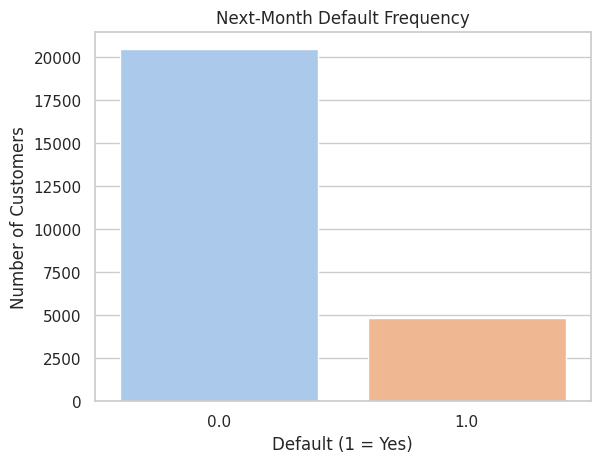

Default rate: 19.04%


In [12]:
## 2. Exploratory Data Analysis (EDA) & Financial Insight
# Default class balance
sns.countplot(x='next_month_default', data=train_df, palette='pastel')
plt.title('Next-Month Default Frequency')
plt.xlabel('Default (1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()
# Default rate as %
default_rate = train_df['next_month_default'].mean()
print(f"Default rate: {default_rate:.2%}")


In [13]:
## The dataset is imbalanced, with only about ~22% customers defaulting in the next month. We'll need to address this imbalance during model training.

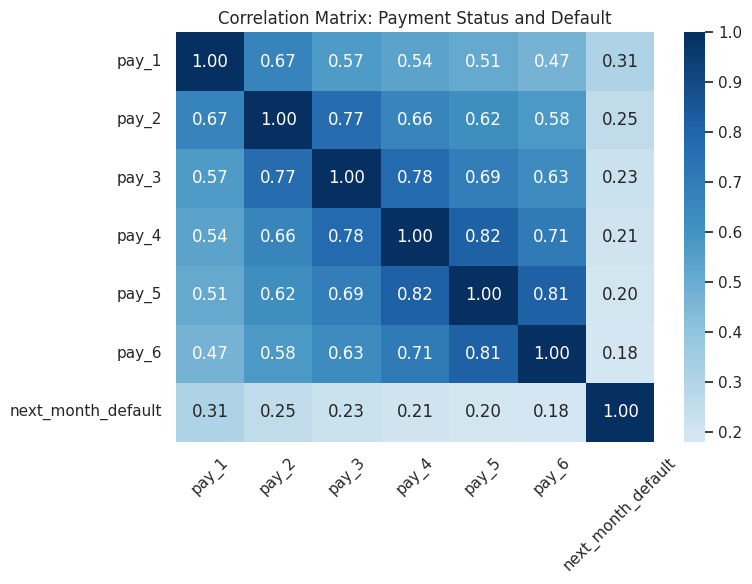

In [14]:
# Step 2.2: Correlation Between Payment Status and Default
pay_cols = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
corr_matrix = train_df[pay_cols + ['next_month_default']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center=0, fmt=".2f")
plt.title("Correlation Matrix: Payment Status and Default")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [15]:
## This heatmap shows how past monthly payment behaviors (`pay_1` to `pay_6`) relate to each other and to default.


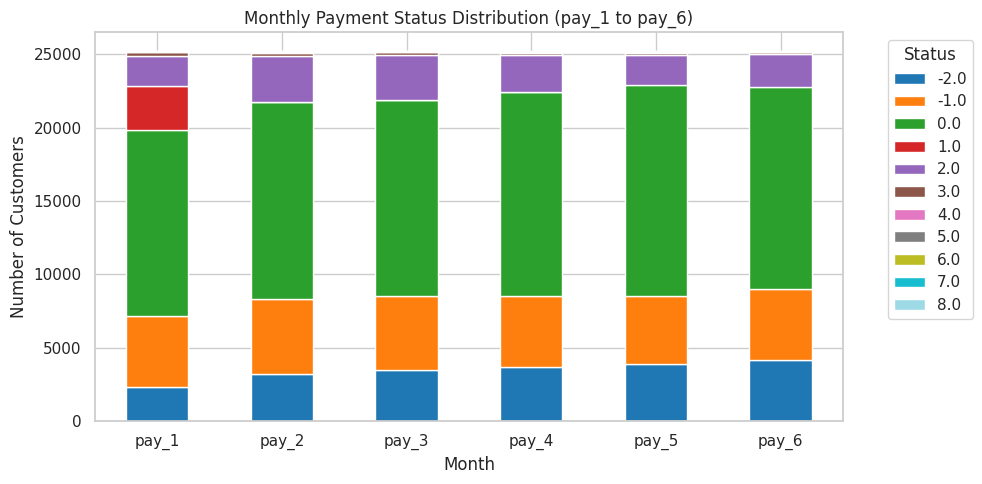

In [16]:
# Step 2.3: Monthly Payment Status Distribution (pay_1 to pay_6)
pay_cols = [f'pay_{i}' for i in range(1, 7)]

# Create a stacked bar chart of value counts across all pay_X columns
train_df[pay_cols].apply(pd.Series.value_counts).T.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 5),
    colormap='tab20'
)
plt.title("Monthly Payment Status Distribution (pay_1 to pay_6)")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [17]:

## Most customers paid bills on time or with a short delay. Longer delays are rare but may strongly predict default.


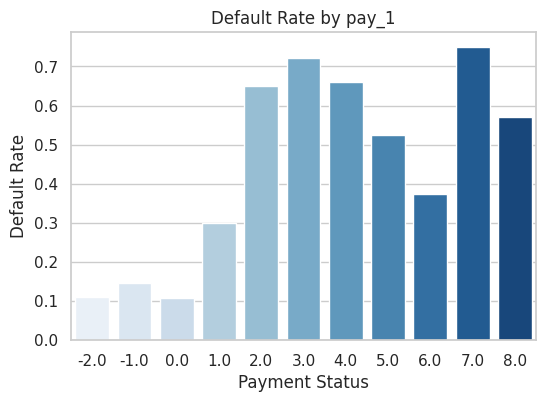

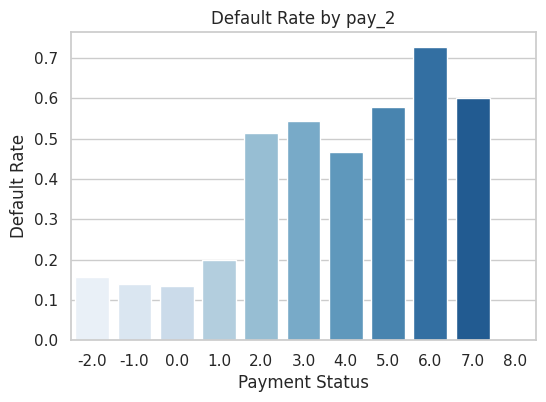

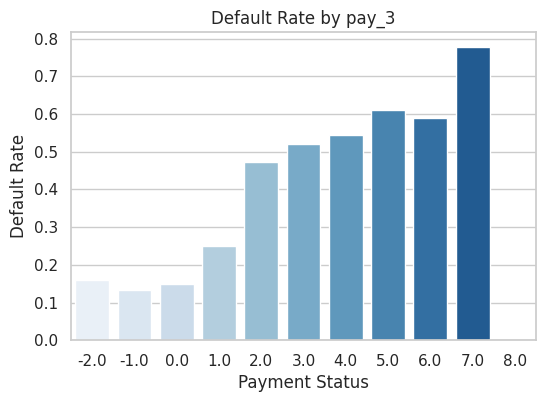

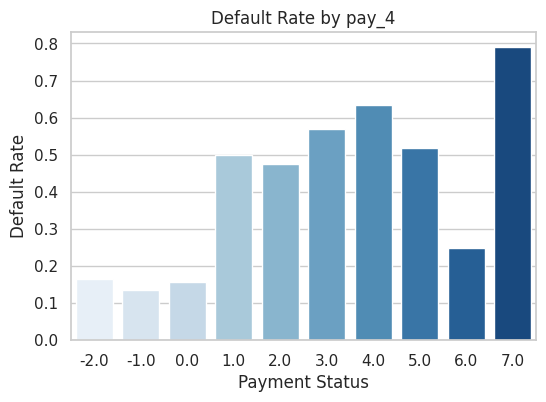

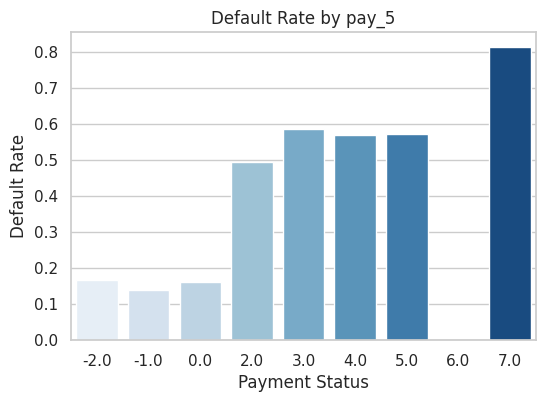

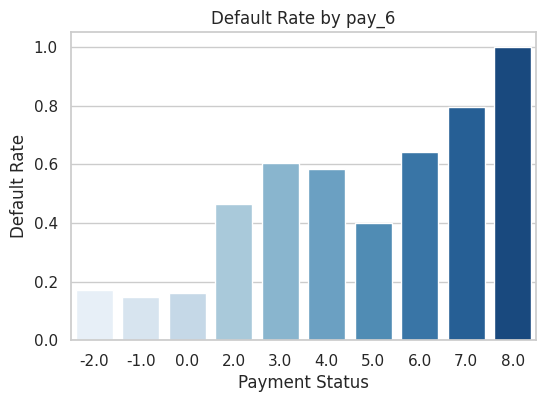

In [18]:
# Step 2.4: Default Rate by Payment Status Value (per Month)
for col in pay_cols:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=col, y='next_month_default', data=train_df, ci=None, palette='Blues')
    plt.title(f'Default Rate by {col}')
    plt.ylabel('Default Rate')
    plt.xlabel('Payment Status')
    plt.show()



In [19]:
# Higher payment status like 1,2,...8 results in higher default rate.
# Customers who regularly pay on time (-1 or 0) are far less risky.

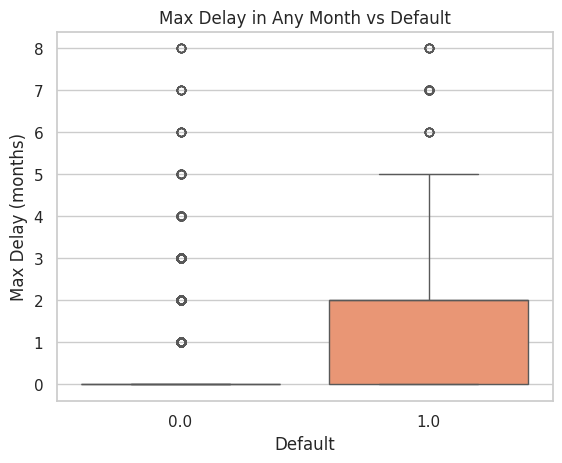

In [20]:
# Step 2.5: Max Raw Delay (no feature engineering logic)
train_df['EDA_MAX_DELAY'] = train_df[pay_cols].replace({-2: 0, -1: 0}).max(axis=1)

sns.boxplot(x='next_month_default', y='EDA_MAX_DELAY', data=train_df, palette='Set2')
plt.title('Max Delay in Any Month vs Default')
plt.xlabel('Default')
plt.ylabel('Max Delay (months)')
plt.show()


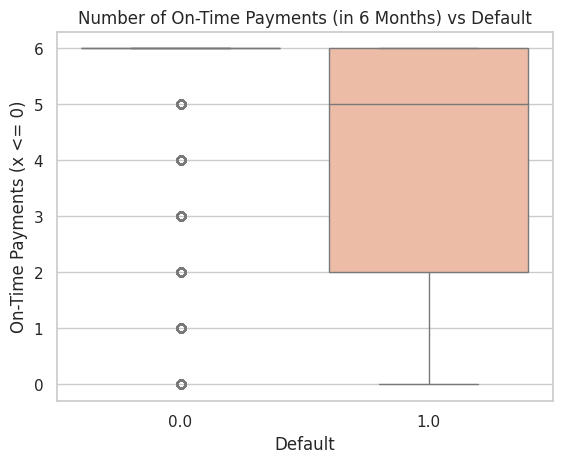

In [21]:
# Step 2.6: Number of On-Time Payments
train_df['EDA_ON_TIME_COUNT'] = train_df[pay_cols].apply(lambda row: sum(x <= 0 for x in row), axis=1)

sns.boxplot(x='next_month_default', y='EDA_ON_TIME_COUNT', data=train_df, palette='coolwarm')
plt.title('Number of On-Time Payments (in 6 Months) vs Default')
plt.ylabel('On-Time Payments (x <= 0)')
plt.xlabel('Default')
plt.show()


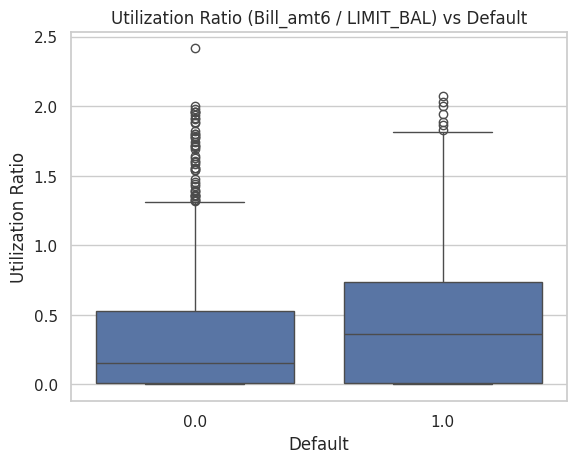

In [22]:
# Step 2.7: Utilization Ratio Using Bill_amt6 and LIMIT_BAL
train_df['EDA_UTILIZATION'] = train_df['Bill_amt6'] / train_df['LIMIT_BAL']
train_df['EDA_UTILIZATION'] = train_df['EDA_UTILIZATION'].clip(upper=5)  # Cap extreme ratios

sns.boxplot(x='next_month_default', y='EDA_UTILIZATION', data=train_df)
plt.title('Utilization Ratio (Bill_amt6 / LIMIT_BAL) vs Default')
plt.xlabel('Default')
plt.ylabel('Utilization Ratio')
plt.show()


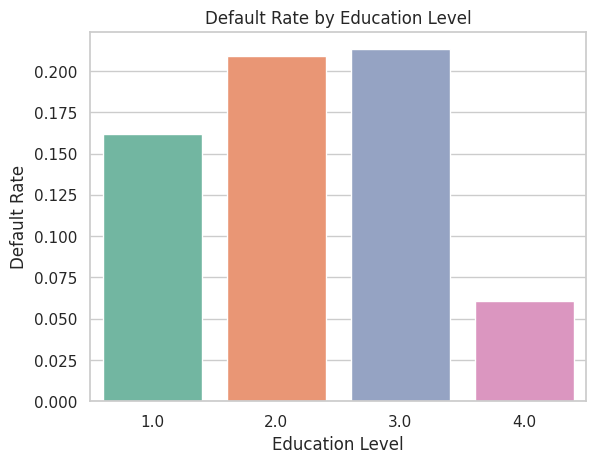

In [23]:
# Step 2.8: Default Rate by Education Level
sns.barplot(x='education', y='next_month_default', data=train_df, ci=None, palette='Set2')
plt.title('Default Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Default Rate')
plt.show()


In [24]:
##Default rates vary across education levels.
#Lower education levels may be linked with higher default risk due to limited financial knowledge or lower income.

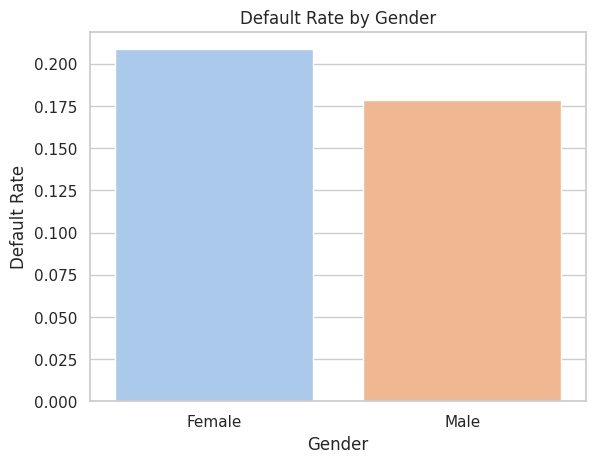

In [25]:
#  Step 2.9 Default Rate by Gender with Correct Labels
sns.barplot(x='sex', y='next_month_default', data=train_df, ci=None, palette='pastel')

plt.title('Default Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Default Rate')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])  # Correct mapping
plt.show()


In [26]:
##In this dataset, males(1)  have a slightly higher default rate than females (0).

## While gender is not a primary risk factor, it adds useful demographic context to the overall credit risk profile.

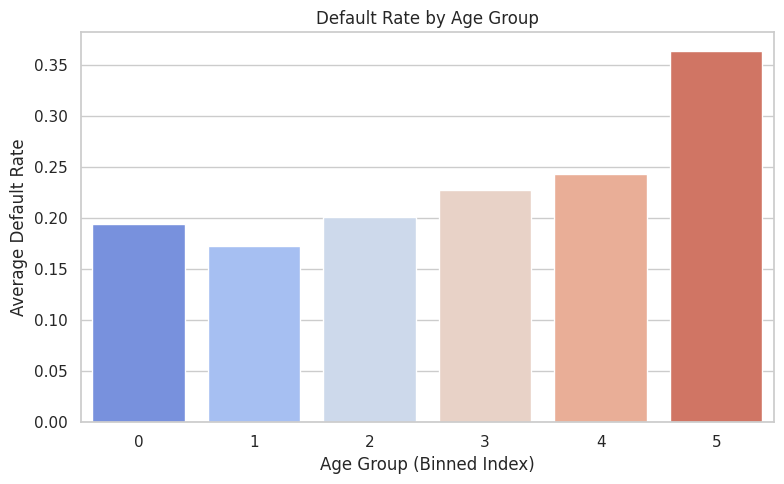

In [27]:
age_bins = [20, 30, 40, 50, 60, 70, 100]
age_labels = [0, 1, 2, 3, 4, 5]  # Numeric bins
train_df['AGE_BIN'] = pd.cut(train_df['age'], bins=age_bins, include_lowest=True).cat.codes
val_df['AGE_BIN'] = pd.cut(val_df['age'], bins=age_bins, include_lowest=True).cat.codes

plt.figure(figsize=(8, 5))
sns.barplot(x='AGE_BIN', y='next_month_default', data=train_df, palette='coolwarm', ci=None)
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group (Binned Index)')
plt.ylabel('Average Default Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


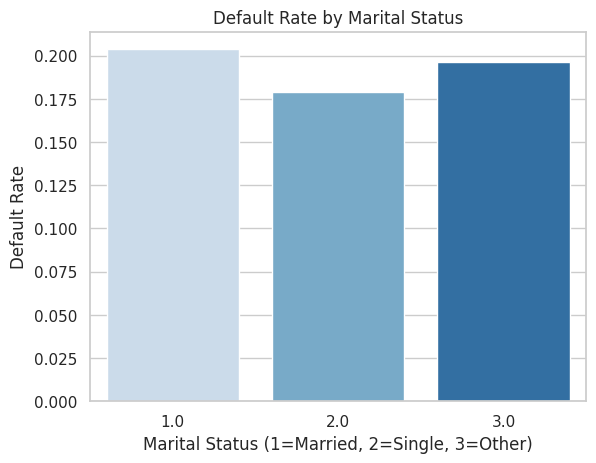

In [28]:
# Step 2.11: Default Rate by Marital Status
sns.barplot(x='marriage', y='next_month_default', data=train_df, ci=None, palette='Blues')
plt.title('Default Rate by Marital Status')
plt.xlabel('Marital Status (1=Married, 2=Single, 3=Other)')
plt.ylabel('Default Rate')
plt.show()


In [29]:
# pay_cols = [f'pay_{i}' for i in range(1, 7)]
# pay_amt_cols = [f'pay_amt{i}' for i in range(1, 7)]
# bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]

In [30]:
def add_features(df):
    df["Credit_Utilization"] = df[bill_cols].mean(axis=1) / (df["LIMIT_BAL"] + 1)
    df["repayment_ratio"] = df[pay_amt_cols].mean(axis=1) / (df[bill_cols].sum(axis=1) + 1)
    df["max_delinquency"] = df[pay_cols].apply(lambda row: row[row > 0].max() if any(row > 0) else 0, axis=1)
    df["ever_delinquent"] = df[pay_cols].apply(lambda row: int(any(row > 0)), axis=1)
    return df


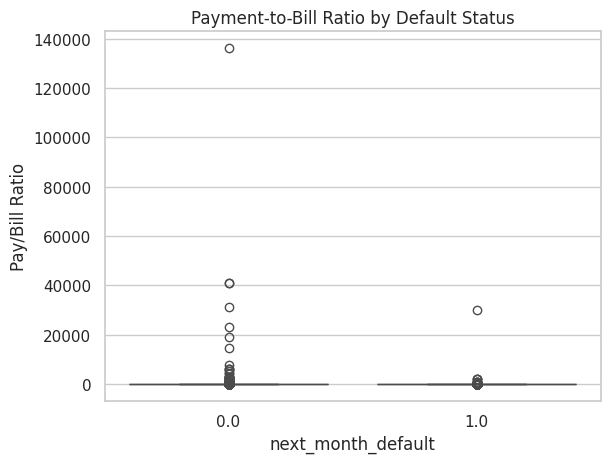

   pay_to_bill_ratio  log_pay_to_bill_ratio
0           0.031947               0.031448
1           0.266246               0.236057
2           0.039850               0.039076
3           0.035660               0.035038
4           0.723892               0.544585


In [31]:
## 3. Feature Engineering & Financial Insight
# Repayment & Credit Utilization Behavior

# Payment-to-bill ratio

train_df['pay_to_bill_ratio'] = (
    train_df[[f'pay_amt{i}' for i in range(1, 7)]].sum(axis=1)/(train_df[[f'Bill_amt{i}' for i in range(1, 7)]].sum(axis=1) + 1))
sns.boxplot(x='next_month_default', y='pay_to_bill_ratio', data=train_df)
plt.title("Payment-to-Bill Ratio by Default Status")
plt.ylabel("Pay/Bill Ratio")
plt.show()
train_df['log_pay_to_bill_ratio'] = np.log1p(train_df['pay_to_bill_ratio'])
print(train_df[['pay_to_bill_ratio', 'log_pay_to_bill_ratio']].head())


In [32]:
## Customers with low repayment ratios (i.e., pay far less than billed) are far more likely to default.

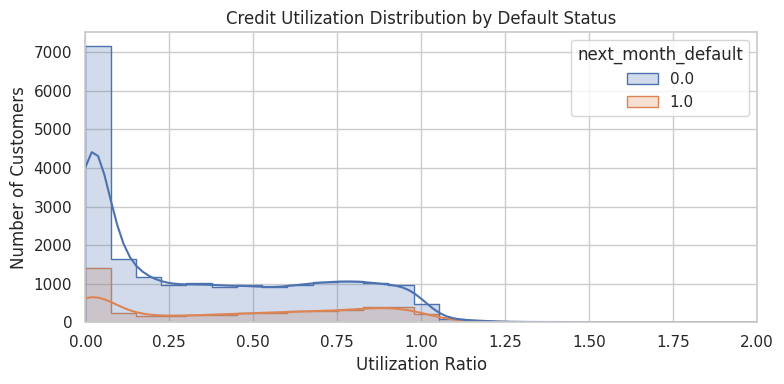

In [33]:

# Credit Utilization Ratio
train_df['CREDIT_UTIL_RATIO'] = train_df[[f'Bill_amt{i}' for i in range(1, 7)]].mean(axis=1) / (train_df['LIMIT_BAL'] + 1)

plt.figure(figsize=(8, 4))
sns.histplot(data=train_df, x='CREDIT_UTIL_RATIO', hue='next_month_default', kde=True,
             bins=50, element='step', common_norm=False)
plt.title('Credit Utilization Distribution by Default Status')
plt.xlabel('Utilization Ratio')
plt.ylabel('Number of Customers')
plt.xlim(0, 2)  # Limit to focus on meaningful region
plt.tight_layout()
plt.show()


In [34]:
##  Credit Utilization Ratio
# I created a new feature that shows how much of their credit limit customers use on average. This plot compares utilization between defaulters and non-defaulters to see if high usage links to higher risk.


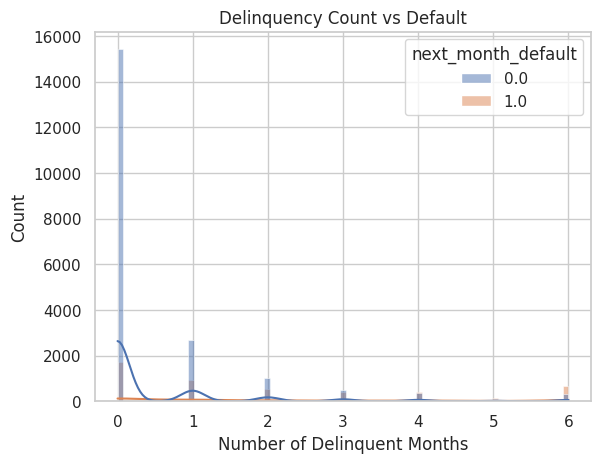

In [35]:
# Delinquency count
train_df['DELINQUENCY_COUNT'] = train_df[pay_cols].apply(lambda row: sum(x > 0 for x in row), axis=1)

sns.histplot(data=train_df, x='DELINQUENCY_COUNT', hue='next_month_default', kde=True)
plt.title('Delinquency Count vs Default')
plt.xlabel('Number of Delinquent Months')
plt.show()


In [36]:
## The number of delinquent months is directly proportional to the risk of default.

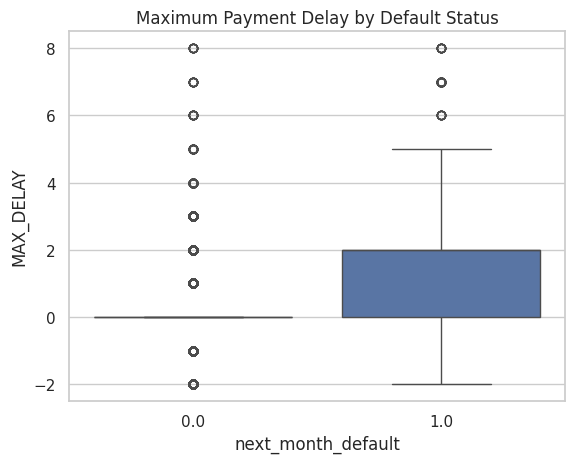

In [37]:
# Maximum delay
train_df['MAX_DELAY'] = train_df[pay_cols].max(axis=1)

sns.boxplot(x='next_month_default', y='MAX_DELAY', data=train_df)
plt.title('Maximum Payment Delay by Default Status')
plt.show()

In [38]:
### Maximum Payment Delay by Default Status

# Here, I created a feature called `MAX_DELAY` that captures the longest payment delay across all months for each customer. This helps identify individuals with a severe delay history.
# The boxplot shows how maximum delay differs between defaulters and
# non-defaulters. As expected, defaulters tend to have higher maximum delays,
# indicating that longer payment delays can be a strong signal for predicting
# default risk.


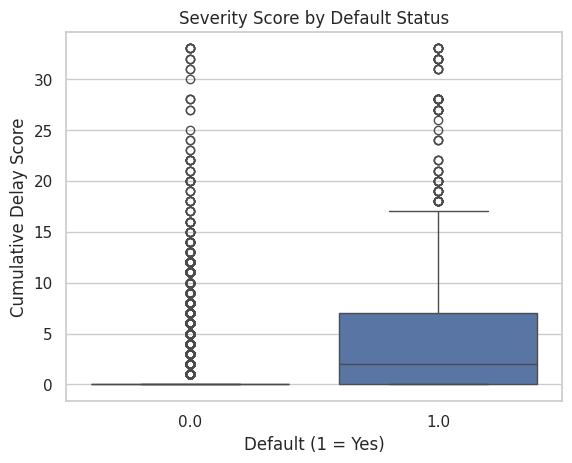

In [39]:
# Step 3.6: Severity Score (Total Severity of Delays)
pay_cols = [f'pay_{i}' for i in range(1, 7)]
train_df['severity_score'] = train_df[pay_cols].clip(lower=0).sum(axis=1)
sns.boxplot(x='next_month_default', y='severity_score', data=train_df)
plt.title("Severity Score by Default Status")
plt.ylabel("Cumulative Delay Score")
plt.xlabel("Default (1 = Yes)")
plt.show()


In [40]:
###  Severity Score: Total Payment Delay Impact

# In this step, I created a `severity_score` feature to measure the total
# severity of delays over 6 months. It sums only positive delay values (ignoring
# early or on-time payments) across all months.

# The boxplot shows that customers who defaulted usually had a higher cumulative
# delay score, highlighting the importance of both the frequency and length of
# delays in predicting default risk.


In [41]:
# Step 3.7: Credit Limit Segmentation
# Step: Credit Limit Segmentation
limit_bins = [0, 50000, 100000, 160000, 220000, 300000, 1000000]
limit_labels = ['very_low', 'low', 'med_low', 'med_high', 'high', 'very_high']

train_df['LIMIT_BIN_LABEL'] = pd.cut(train_df['LIMIT_BAL'], bins=limit_bins, labels=limit_labels, include_lowest=True)
val_df['LIMIT_BIN_LABEL'] = pd.cut(val_df['LIMIT_BAL'], bins=limit_bins, labels=limit_labels, include_lowest=True)

# Ensure categorical type
train_df['LIMIT_BIN_LABEL'] = train_df['LIMIT_BIN_LABEL'].astype('category')
val_df['LIMIT_BIN_LABEL'] = val_df['LIMIT_BIN_LABEL'].astype('category')


In [42]:
# Encoded LIMIT_BIN_LABEL to numeric for modeling

train_df['LIMIT_BIN_LABEL_enc'] = train_df['LIMIT_BIN_LABEL'].cat.codes
val_df['LIMIT_BIN_LABEL_enc'] = val_df['LIMIT_BIN_LABEL'].cat.codes


In [43]:
train_df['LIMIT_BIN_LABEL'] = train_df['LIMIT_BIN_LABEL'].cat.codes
val_df['LIMIT_BIN_LABEL'] = val_df['LIMIT_BIN_LABEL'].cat.codes

##  Encoded Credit Limit Bins
# Converted the categorical credit limit bins (`LIMIT_BIN_LABEL`) into numeric
# codes using `.cat.codes`. This makes the data compatible with machine learning
# models that require numeric input.



In [44]:
print(train_df['LIMIT_BIN_LABEL'].unique())
print(train_df['LIMIT_BIN_LABEL'].dtype)


[1 4 3 0 5 2]
int8


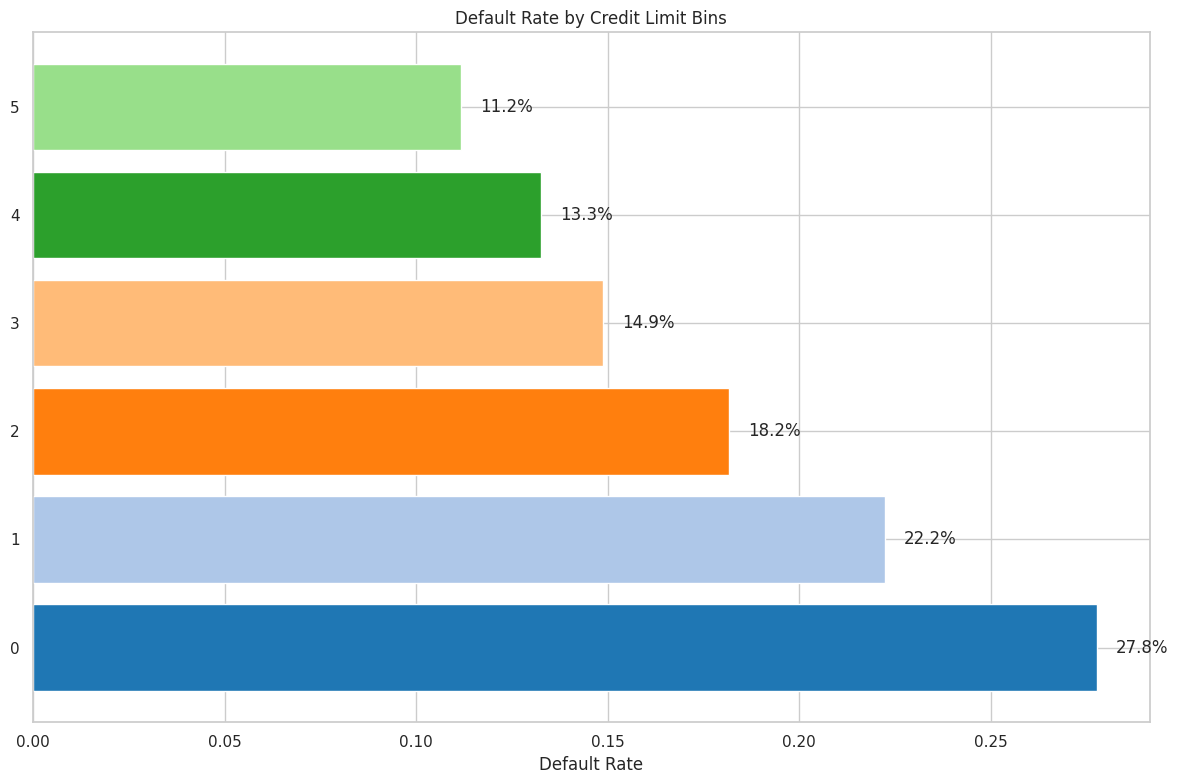

In [45]:
# Calculate default rate per credit limit bin
limit_default_rate = train_df.groupby('LIMIT_BIN_LABEL')['next_month_default'].mean()

plt.figure(figsize=(12, 8))

# Horizontal bar plot with color palette
bars = plt.barh(limit_default_rate.index.astype(str),
                limit_default_rate.values,
                color=sns.color_palette("tab20", len(limit_default_rate)))

plt.xlabel('Default Rate')
plt.title('Default Rate by Credit Limit Bins')

# Add percentage labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005,
             bar.get_y() + bar.get_height() / 2,
             f'{width * 100:.1f}%',
             va='center')

plt.tight_layout()
plt.show()


In [46]:
## Lower credit limit groups show a slightly higher default rate, suggesting more cautious lending for high-risk segments.

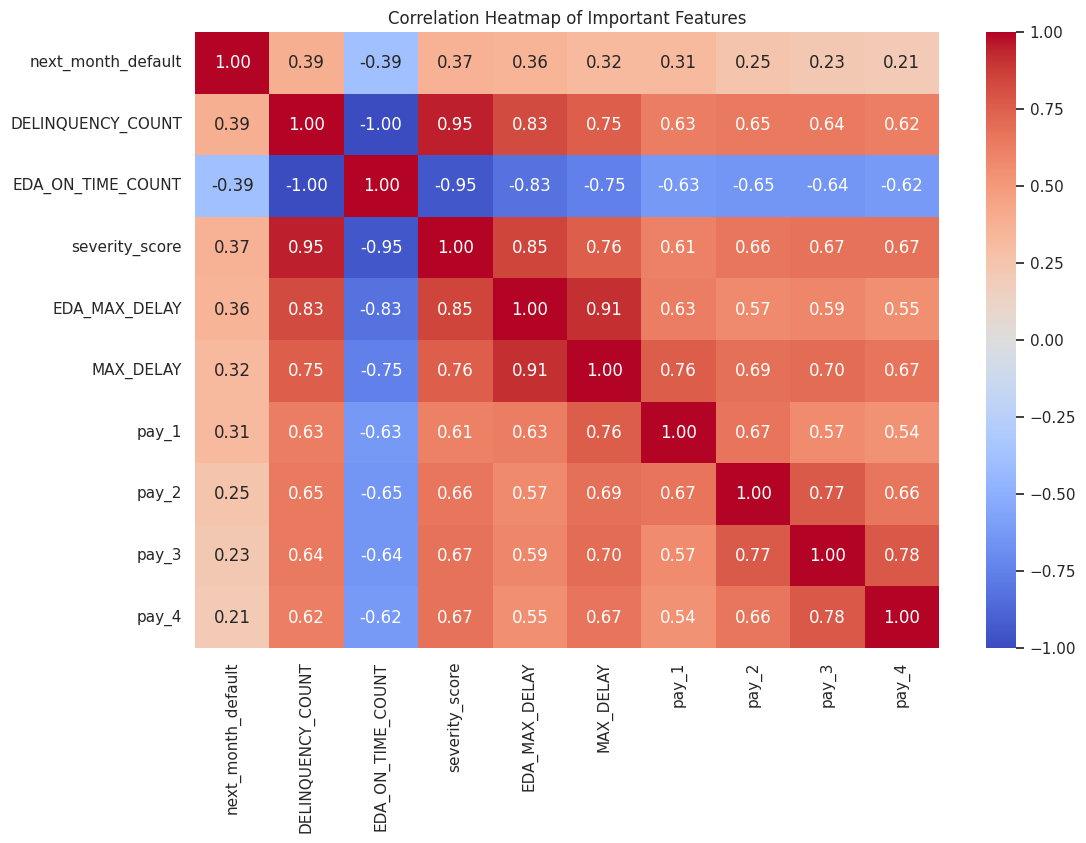

In [47]:
# Correlation Heatmap
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
#only numeric columns
corr_matrix = train_df[numeric_cols].corr()
target_corr = corr_matrix['next_month_default'].sort_values(key=np.abs, ascending=False)
important_features = target_corr[abs(target_corr) > 0.2].index
plt.figure(figsize=(12, 8))
sns.heatmap(train_df[important_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Important Features")
plt.show()



In [48]:
# In this step, I looked at how strongly each numeric feature is related to the
# target variable, `next_month_default`. I kept only those with a correlation
# above 0.2 (positive or negative) to highlight the most relevant ones.
# This heatmap helps spot which features are more predictive of default and also
# shows if any of them are strongly related to each other.

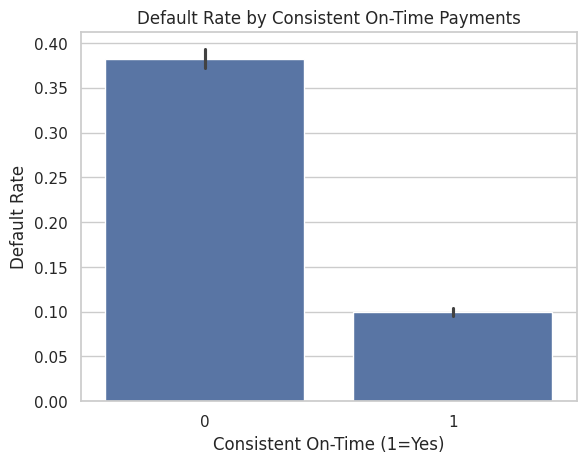

In [49]:
# Step 3.8: Consistency Feature
train_df['CONSISTENT_ON_TIME'] = train_df[pay_cols].apply(lambda row: int(all(x <= 0 for x in row)), axis=1)

sns.barplot(x='CONSISTENT_ON_TIME', y='next_month_default', data=train_df)
plt.title("Default Rate by Consistent On-Time Payments")
plt.xlabel("Consistent On-Time (1=Yes)")
plt.ylabel("Default Rate")
plt.show()


In [50]:
train_df['MAX_DELAY'] = train_df[pay_cols].max(axis=1)
print(train_df[['MAX_DELAY']].head())

   MAX_DELAY
0        2.0
1        0.0
2        0.0
3        0.0
4       -2.0


In [51]:
## Creating MAX_DELAY Feature

# I created a feature called `MAX_DELAY`, which records the highest (i.e.,
# worst) payment delay for each customer over the last 6 months. Positive values
# mean delayed payments, while negative values suggest early payments. This
# helps capture each customer’s most severe delay behavior — whether early or late.


In [52]:
# Step 3.9: Total Payment Amount over 6 Months
train_df['TOTAL_PAY_AMT'] = train_df[[f'pay_amt{i}' for i in range(1, 7)]].sum(axis=1)


In [53]:
train_df['LIMIT_BIN_LABEL'].value_counts().sort_index()

,count
LIMIT_BIN_LABEL,
0,6391
1,4016
2,3898
3,3802
4,3283
5,3857


In [54]:
## Credit Limit Bin Distribution
# Quickly checking how many customers fall into each credit limit group to see
# if the bins are balanced. %% ## step-4 Class Imbalance & Model Performance

In [55]:

## step-4 Class Imbalance & Model Performance

# step 4.1: Separate features and target
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=['Customer_ID', 'next_month_default'])
y = train_df['next_month_default']

# Split the labeled data into training and internal test (evaluation) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



In [56]:
## Train-Test Split for Modeling
# I separated the features and target, then split the data into training and
# validation sets. Stratified sampling is used to keep the class distribution
# consistent, which is important since the dataset is imbalanced. %% # The
# training and validation sets preserve the original class imbalance (~19%
# default rate), confirming a successful stratified split.

In [57]:
X_train.isnull().sum().sort_values(ascending=False).head()


,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0


In [58]:
# step 4.2: Convert all features to float
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [59]:
## Ensuring Numeric Feature Types
# Converted all feature values to float to avoid any data type issues during
# model training. %%

In [60]:

# Final and strict conversion of all X_train columns to float (numeric)
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [61]:
print("Non-numeric columns left:", X_train.select_dtypes(exclude=['number']).columns.tolist())


Non-numeric columns left: []


In [62]:
# Just making sure there are no leftover non-numeric columns before training the
# model. %% Apply get_dummies for all categorical columns

In [64]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Confirm new class balance
print("Class distribution after SMOTE:", Counter(y_train_bal))

Class distribution after SMOTE: Counter({0.0: 16352, 1.0: 16352})


In [65]:
### Balancing Classes with SMOTE

# Used SMOTE to balance the target classes in the training data by synthetically
# generating samples for the minority class. This helps the model learn better from both classes.


In [67]:
# # Define models

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    preds = model.predict(X_test)
    probas = model.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, preds)
    auc = roc_auc_score(y_test, probas)

    results[name] = {'F1 Score': f1, 'AUC-ROC': auc}

    print(f"\n--- {name} ---")

    print(classification_report(y_test, preds))


--- Logistic Regression ---
              precision    recall  f1-score   support

         0.0       0.90      0.51      0.65      4088
         1.0       0.27      0.76      0.40       962

    accuracy                           0.56      5050
   macro avg       0.58      0.64      0.52      5050
weighted avg       0.78      0.56      0.60      5050


--- Decision Tree ---
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87      4088
         1.0       0.46      0.59      0.52       962

    accuracy                           0.79      5050
   macro avg       0.68      0.71      0.69      5050
weighted avg       0.81      0.79      0.80      5050


--- XGBoost ---
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      4088
         1.0       0.59      0.35      0.44       962

    accuracy                           0.83      5050
   macro avg       0.73      0.65      0.67      5050
weigh

In [68]:
### Model Training & Evaluation

# I trained multiple classification models (Logistic Regression, Decision Tree,
# XGBoost, LightGBM, and Random Forest) on the balanced training data.

#For each model, I evaluated performance using F1 Score and AUC-ROC on the validation set.
# This helps compare how well each model handles the imbalanced default prediction task.


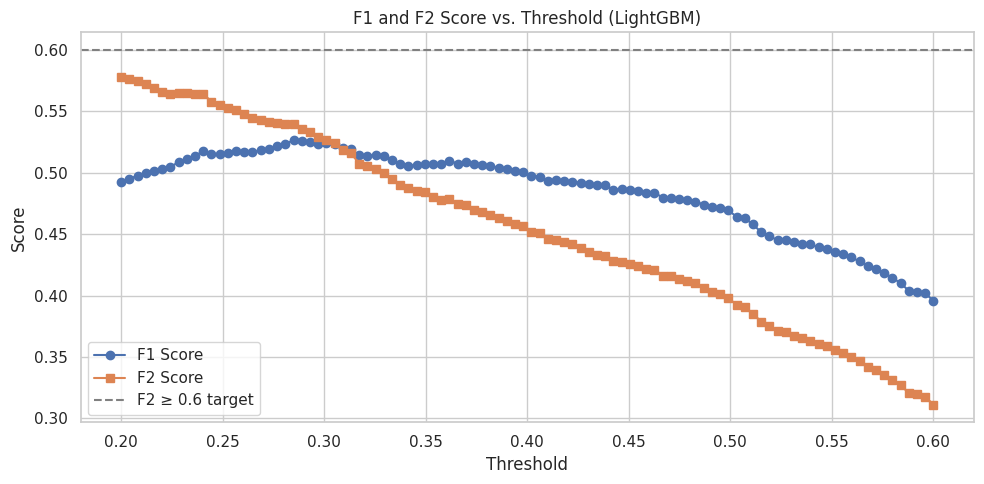

Selected Threshold: 0.20
F1 Score at this threshold: 0.4922
F2 Score at this threshold: 0.5784


In [69]:

# step 4.5: Threshold tuning using F2 score for LightGBM
from sklearn.metrics import fbeta_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities using LightGBM
lgbm_model = models['LightGBM']
test_probs = lgbm_model.predict_proba(X_test)[:, 1]

# Sweep thresholds from 0.2 to 0.6
thresholds = np.linspace(0.2, 0.6, 100)
f1_scores = []
f2_scores = []

for t in thresholds:
    preds = (test_probs > t).astype(int)
    f1_scores.append(f1_score(y_test, preds))
    f2_scores.append(fbeta_score(y_test, preds, beta=2))

# Plot F1 and F2 vs threshold
plt.figure(figsize=(10, 5))
plt.plot(thresholds, f1_scores, label="F1 Score", marker='o')
plt.plot(thresholds, f2_scores, label="F2 Score", marker='s')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("F1 and F2 Score vs. Threshold (LightGBM)")
plt.axhline(y=0.6, color='gray', linestyle='--', label='F2 ≥ 0.6 target')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Best threshold based on F2
best_idx = np.argmax(f2_scores)
best_threshold = thresholds[best_idx]
print(f"Selected Threshold: {best_threshold:.2f}")
print(f"F1 Score at this threshold: {f1_scores[best_idx]:.4f}")
print(f"F2 Score at this threshold: {f2_scores[best_idx]:.4f}")


In [70]:
## Tuning the Classification Threshold

# Rather than sticking with the usual 0.5 cutoff, I tested a range of thresholds
# (from 0.2 to 0.6) to see where the model performs best.

# For each threshold, I calculated both the **F1 Score** and **F2 Score**. Since
# F2 gives more importance to recall (catching defaulters), it's especially
# useful in our case.

# The plot helps visualize how the scores change, and I picked the threshold
# that gave the best F2 score  giving us a better balance for handling
# imbalanced default cases.


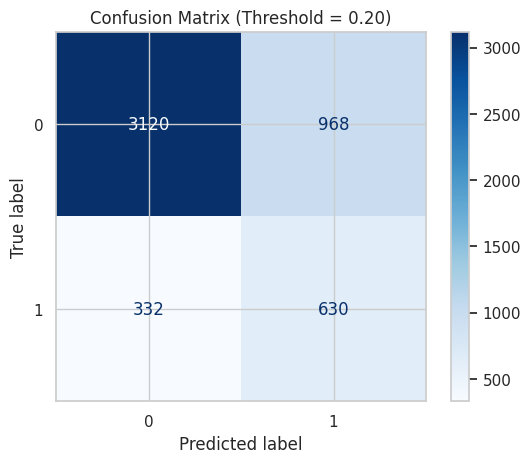

In [71]:

# step 4.6: Confusion Matrix using selected threshold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = (test_probs > best_threshold).astype(int)
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (Threshold = {best_threshold:.2f})')
plt.show()


In [ ]:
### Confusion Matrix at Tuned Threshold

# Using the optimized threshold, I generated predictions and plotted the
# confusion matrix. This gives a clear picture of how well the model is
# identifying defaults vs. non-defaults, and helps evaluate false positives and
# false negatives — which are especially important in credit risk scenarios.


In [73]:


# 1. Strip whitespace from column names
val_df.columns = val_df.columns.str.strip()

# 2. Drop ID and preprocess
X_val_final = val_df.drop(columns=['Customer_ID'])
X_val_final = pd.get_dummies(X_val_final, drop_first=True)
X_val_final = X_val_final.reindex(columns=X_train.columns, fill_value=0)

# 3. Predict probabilities and apply threshold
val_probs = models['LightGBM'].predict_proba(X_val_final)[:, 1]
val_preds = (val_probs > best_threshold).astype(int)

# 4. Prepare submission
submission_df = pd.DataFrame({
    'Customer_ID': val_df['Customer_ID'],
    'next_month_default': val_preds
})
submission_df.to_csv("final_predictions.csv", index=False)
submission_df.head(20)


,Customer_ID,next_month_default
0,1.0,0
1,2.0,0
2,3.0,0
3,4.0,1
4,5.0,0
5,6.0,0
6,7.0,0
7,8.0,0
8,9.0,0
9,10.0,0


In [2]:
### Final Prediction and Submission File

# In this step, I applied the trained LightGBM model to the validation (test) data:
# 1. Cleaned and preprocessed the validation set to match the training format.
# 2. Re-applied all necessary feature engineering and aligned column structure.
# 3. Predicted default probabilities using the trained model.
# 4. Used the previously selected threshold to convert probabilities into final class predictions.
# 5. Created a submission DataFrame with `Customer_ID` and predicted `next_month_default`.
# 6. Saved the results to a CSV file for submission or review.



In [75]:
# Count of predicted defaulters
num_defaulters = submission_df['next_month_default'].sum()

# Total number of customers
total_customers = len(submission_df)

# Calculated percentage
default_rate = (num_defaulters / total_customers) * 100

print(f"Predicted Defaulters: {num_defaulters} out of {total_customers}")
print(f"Default Rate: {default_rate:.2f}%")


Predicted Defaulters: 1246 out of 5016
Default Rate: 24.84%


In [76]:
## Predicted Default Rate
# Calculated how many customers were predicted to default out of the total validation set.
# This gives a quick look at the overall default rate according to the model's final predictions.


In [77]:
import pandas as pd

# Preview top 10 rows
df = pd.read_csv("final_predictions.csv")
df.head(10)


,Customer_ID,next_month_default
0,1.0,0
1,2.0,0
2,3.0,0
3,4.0,1
4,5.0,0
5,6.0,0
6,7.0,0
7,8.0,0
8,9.0,0
9,10.0,0


In [78]:
# !ls -l final_predictions.csv

In [79]:
from google.colab import files
files.download("final_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Downloaded the `final_predictions.csv` file